In [56]:
import pysplit
import pandas as pd
working_dir = r'C:/hysplit4/working'
storage_dir = r'D:/UTD/UTDSummer2023/test_hysplit/traj'
meteo_dir = r'D:/UTD/UTDSpring2023/Air-Parcel Trajectory/data'


In [57]:
basename = 'gokul'
years = [2023]
months = [1]
hours = [11,12,13,14, 15,16]
altitudes = [10,15,20]
location = (32.71568066666667, -96.74800683333333)
runtime = -120

In [58]:
pysplit.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
                          years, months, hours, altitudes, location, runtime,
                          monthslice=slice(0, 32, 2), get_reverse=True,
                          get_clipped=True)

KeyError: 500.0

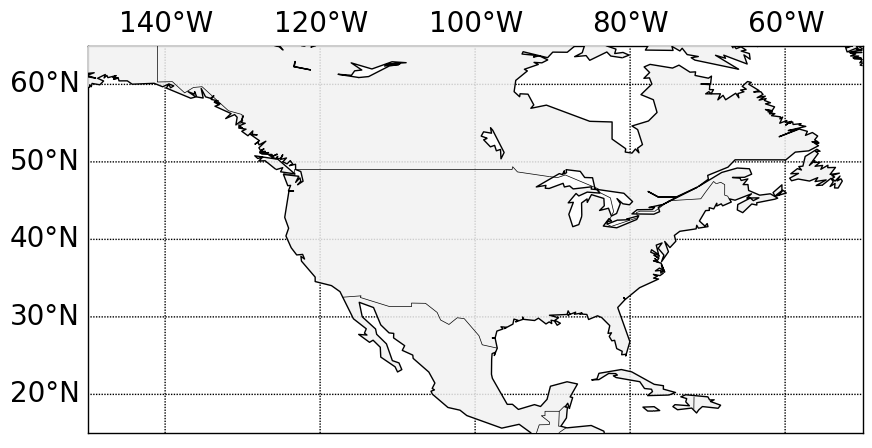

In [59]:
"""
=============================================
Basic Trajectory Plotting and Using MapDesign
=============================================

How to quickly initialize a matplotlib Basemap with the ``MapDesign``
class and plot ``Trajectory`` paths.

For this example we'll initialize only the January trajectories created in
``bulk_trajgen_example.py``.

"""
import pysplit

trajgroup = pysplit.make_trajectorygroup(r'D:/UTD/UTDSummer2023/test_hysplit/traj/*jan*')

"""
Basemaps and MapDesign
----------------------
PySPLIT's ``MapDesign`` class uses the matplotlib Basemap toolkit to quickly
set up attractive maps.  The user is not restricted to using maps
produced from ``MapDesign``, however- any Basemap will serve in the section
below entitled 'Plotting ``Trajectory`` Paths.

Creating a basic cylindrical map using ``MapDesign``  only requires
``mapcorners``, a list of the lower-left longitude, lower-left latitude,
upper-right longitude, and upper-right latitude values.
The ``standard_pm``, a list of standard parallels and meridians,
may be passed as ``None``.

"""
mapcorners =  [-150, 15, -50, 65]
standard_pm = None

bmap_params = pysplit.MapDesign(mapcorners, standard_pm)

"""
Once the ``MapDesign`` is initialized it can be used to draw a map:

"""
bmap = bmap_params.make_basemap()

"""
Plotting ``Trajectory`` Paths
-----------------------------
For this example, we will color-code by initialization (t=0) altitude,
(500, 1000, or 1500 m), which can be accessed via ``Trajectory.data.geometry``,
 a ``GeoSeries`` of Shapely ``Point`` objects.

We can store the trajectory color in ``Trajectory.trajcolor`` for convenience.

"""
color_dict = {10 : 'blue',
              15 : 'orange',
              20 : 'black'}

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    print(altitude0)
    #traj.trajcolor = color_dict[altitude0]

"""
For display purposes, let's plot only every fifth ``Trajectory``.  The lats,
lons are obtained by unpacking the ``Trajectory.Path``
(Shapely ``LineString``) xy coordinates.

"""
for traj in trajgroup[::5]:
     bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)

In [60]:
for traj in trajgroup[::5]:
    df = pd.DataFrame(traj.data)
    

In [61]:
df

,Timestep,Pressure,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,
0.0,0.0,953.8,POINT Z (-96.00000 32.00000 500.00000),2023-01-31 23:00:00,None,None,None
-1.0,-1.0,952.9,POINT Z (-96.05000 32.27800 514.90000),2023-01-31 22:00:00,None,None,None
-2.0,-2.0,941.2,POINT Z (-96.11300 32.52400 583.30000),2023-01-31 21:00:00,None,None,None
-3.0,-3.0,927.3,POINT Z (-96.17400 32.71700 652.40000),2023-01-31 20:00:00,None,None,None
-4.0,-4.0,923.8,POINT Z (-96.21000 32.87100 663.70000),2023-01-31 19:00:00,None,None,None
...,...,...,...,...,...,...,...
-116.0,-116.0,795.1,POINT Z (-115.58800 65.95300 1452.10000),2023-01-27 03:00:00,None,None,None
-117.0,-117.0,796.2,POINT Z (-115.88100 66.28100 1450.70000),2023-01-27 02:00:00,None,None,None
-118.0,-118.0,796.3,POINT Z (-116.18300 66.61000 1448.30000),2023-01-27 01:00:00,None,None,None


In [7]:
color_dict = {500.0 : 'blue',
              1000.0 : 'orange',
              1500.0 : 'black'}

In [63]:

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    print(traj.data.geometry)
    #traj.trajcolor = color_dict[altitude0]

Timestep
 0.0        POINT Z (-96.00000 32.00000 500.00000)
-1.0        POINT Z (-96.38800 31.61500 458.70000)
-2.0        POINT Z (-96.77000 31.24000 441.30000)
-3.0        POINT Z (-97.14000 30.85100 428.00000)
-4.0        POINT Z (-97.47300 30.44700 428.00000)
                            ...                   
-116.0    POINT Z (-122.65400 29.27400 3193.80000)
-117.0    POINT Z (-122.88200 29.36400 3265.10000)
-118.0    POINT Z (-123.13600 29.45500 3326.70000)
-119.0    POINT Z (-123.41800 29.54600 3399.40000)
-120.0    POINT Z (-123.72200 29.61900 3483.00000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.00000 32.00000 1000.00000)
-1.0        POINT Z (-96.45000 31.72800 935.50000)
-2.0        POINT Z (-96.90700 31.46500 935.50000)
-3.0        POINT Z (-97.37000 31.22600 942.60000)
-4.0        POINT Z (-97.84200 30.98700 916.40000)
                            ...                   
-116.0    POINT Z (-168.72800 25.16200 1125.60000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.74800 32.71600 500.00000)
-1.0       POINT Z (-97.16200 32.38000 501.10000)
-2.0       POINT Z (-97.60100 32.08600 529.30000)
-3.0       POINT Z (-98.07100 31.81800 584.60000)
-4.0       POINT Z (-98.56000 31.56200 638.30000)
                           ...                   
-116.0    POINT Z (-162.62700 31.38800 508.60000)
-117.0    POINT Z (-163.24900 30.99100 528.20000)
-118.0    POINT Z (-163.86900 30.59100 555.10000)
-119.0    POINT Z (-164.49800 30.19200 580.20000)
-120.0    POINT Z (-165.12500 29.80000 587.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 1000.00000)
-1.0       POINT Z (-97.20200 32.40200 1007.60000)
-2.0       POINT Z (-97.67300 32.12800 1035.70000)
-3.0       POINT Z (-98.17200 31.88000 1084.10000)
-4.0       POINT Z (-98.68300 31.65400 1141.70000)
                            ...                   
-116.0    POINT Z (-131.85900 38.38800 1826.30000)
-117.0    POINT Z (-132.44600 

Timestep
 0.0      POINT Z (-96.74800 32.71600 20.00000)
-1.0      POINT Z (-96.92100 32.71300 27.00000)
-2.0      POINT Z (-97.10800 32.70900 37.90000)
-3.0      POINT Z (-97.32200 32.70100 53.30000)
-4.0      POINT Z (-97.57800 32.68700 72.70000)
                          ...                  
-116.0    POINT Z (-120.51100 31.95900 0.80000)
-117.0    POINT Z (-120.68300 31.99600 1.60000)
-118.0    POINT Z (-120.85500 32.01600 2.10000)
-119.0    POINT Z (-121.03000 32.02200 2.40000)
-120.0    POINT Z (-121.20000 32.01900 2.60000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.74800 32.71600 100.00000)
-1.0        POINT Z (-97.02600 32.73400 124.90000)
-2.0        POINT Z (-97.34400 32.75000 159.60000)
-3.0        POINT Z (-97.72800 32.76300 199.30000)
-4.0        POINT Z (-98.18100 32.76900 240.30000)
                            ...                   
-116.0    POINT Z (-145.26200 47.37200 6619.20000)
-117.0    POINT Z (-146.02500 47.10700 6519.60000)
-

Timestep
 0.0       POINT Z (-96.74800 32.71600 15.00000)
-1.0       POINT Z (-96.91700 32.69600 17.60000)
-2.0       POINT Z (-97.09600 32.67500 22.50000)
-3.0       POINT Z (-97.29200 32.65900 30.90000)
-4.0       POINT Z (-97.50800 32.64500 43.80000)
                           ...                  
-116.0    POINT Z (-124.78900 32.17400 31.50000)
-117.0    POINT Z (-125.02900 32.22800 33.80000)
-118.0    POINT Z (-125.26400 32.28900 35.90000)
-119.0    POINT Z (-125.50300 32.34900 37.60000)
-120.0    POINT Z (-125.75200 32.40900 39.30000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0      POINT Z (-96.74800 32.71600 20.00000)
-1.0      POINT Z (-96.92400 32.69600 23.50000)
-2.0      POINT Z (-97.11300 32.67700 30.00000)
-3.0      POINT Z (-97.32100 32.66200 40.50000)
-4.0      POINT Z (-97.55200 32.64800 56.30000)
                          ...                  
-116.0    POINT Z (-135.85700 33.14000 4.00000)
-117.0    POINT Z (-136.15000 33.05700 4.30000)
-118.0    POIN

Timestep
 0.0        POINT Z (-96.74800 32.71600 15.00000)
-1.0        POINT Z (-96.78900 32.82000 16.30000)
-2.0        POINT Z (-96.83800 32.92400 18.20000)
-3.0        POINT Z (-96.89700 33.02500 22.40000)
-4.0        POINT Z (-96.96400 33.12900 30.60000)
                           ...                   
-116.0    POINT Z (-110.56700 51.95700 502.10000)
-117.0    POINT Z (-110.65900 52.07800 496.00000)
-118.0    POINT Z (-110.73700 52.18800 499.40000)
-119.0    POINT Z (-110.78900 52.28400 507.80000)
-120.0    POINT Z (-110.80800 52.36900 517.30000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.74800 32.71600 20.00000)
-1.0        POINT Z (-96.79100 32.82300 21.70000)
-2.0        POINT Z (-96.84100 32.92900 24.10000)
-3.0        POINT Z (-96.90100 33.03300 29.40000)
-4.0        POINT Z (-96.97000 33.14100 39.60000)
                           ...                   
-116.0    POINT Z (-110.76800 52.15800 438.80000)
-117.0    POINT Z (-110.86500 52.2570

Timestep
 0.0        POINT Z (-96.74800 32.71600 133.00000)
-1.0        POINT Z (-96.79200 32.85700 145.10000)
-2.0        POINT Z (-96.85000 33.01300 158.60000)
-3.0        POINT Z (-96.92100 33.17600 165.80000)
-4.0        POINT Z (-97.00800 33.34300 164.80000)
                            ...                   
-116.0    POINT Z (-113.86900 43.97400 2404.10000)
-117.0    POINT Z (-114.42500 44.11400 2603.10000)
-118.0    POINT Z (-115.03000 44.30700 2707.30000)
-119.0    POINT Z (-115.64200 44.51300 2761.00000)
-120.0    POINT Z (-116.24700 44.71400 2743.10000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 500.00000)
-1.0       POINT Z (-96.81100 32.87800 538.00000)
-2.0       POINT Z (-96.88700 33.06100 589.30000)
-3.0       POINT Z (-96.98000 33.26600 633.40000)
-4.0       POINT Z (-97.10400 33.49300 661.50000)
                           ...                   
-116.0    POINT Z (-116.04300 44.05400 101.50000)
-117.0    POINT Z (-116.07

Timestep
 0.0          POINT Z (-96.74800 32.71600 5.00000)
-1.0          POINT Z (-96.87600 32.72800 5.20000)
-2.0          POINT Z (-97.00100 32.71300 5.10000)
-3.0          POINT Z (-97.12000 32.64700 5.40000)
-4.0          POINT Z (-97.23400 32.52800 6.40000)
                            ...                   
-116.0    POINT Z (-113.25300 29.84700 1969.00000)
-117.0    POINT Z (-113.55900 29.88600 1956.40000)
-118.0    POINT Z (-113.85400 29.97000 1939.80000)
-119.0    POINT Z (-114.19100 30.11100 1947.50000)
-120.0    POINT Z (-114.68100 30.33000 1993.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0         POINT Z (-96.74800 32.71600 10.00000)
-1.0         POINT Z (-96.87600 32.72900 10.20000)
-2.0         POINT Z (-97.00200 32.71300 10.10000)
-3.0         POINT Z (-97.12000 32.64800 10.40000)
-4.0         POINT Z (-97.23600 32.52800 11.40000)
                            ...                   
-116.0    POINT Z (-113.52500 30.41000 2282.20000)
-117.0    POINT Z (

Timestep
 0.0        POINT Z (-96.74800 32.71600 133.00000)
-1.0        POINT Z (-96.83800 32.87100 138.00000)
-2.0        POINT Z (-96.93200 33.04300 140.50000)
-3.0        POINT Z (-97.04500 33.22400 137.60000)
-4.0        POINT Z (-97.17300 33.41100 135.40000)
                            ...                   
-116.0    POINT Z (-145.33600 37.02800 5298.20000)
-117.0    POINT Z (-147.16000 37.04800 5314.00000)
-118.0    POINT Z (-149.03100 37.11000 5569.00000)
-119.0    POINT Z (-150.95900 37.08200 5704.20000)
-120.0    POINT Z (-152.92300 37.11000 5673.70000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.74800 32.71600 500.00000)
-1.0        POINT Z (-96.81800 32.88300 475.30000)
-2.0        POINT Z (-96.88300 33.09100 440.20000)
-3.0        POINT Z (-96.97300 33.33500 406.90000)
-4.0        POINT Z (-97.07400 33.61800 393.80000)
                            ...                   
-116.0    POINT Z (-123.76400 23.87000 2451.00000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.74800 32.71600 15.00000)
-1.0       POINT Z (-96.71800 32.63100 12.20000)
-2.0       POINT Z (-96.68200 32.55900 10.40000)
-3.0        POINT Z (-96.64000 32.49700 9.10000)
-4.0        POINT Z (-96.59000 32.44500 8.10000)
                           ...                  
-116.0    POINT Z (-93.73000 49.05200 447.70000)
-117.0    POINT Z (-93.21500 49.12600 482.50000)
-118.0    POINT Z (-92.66000 49.19900 528.20000)
-119.0    POINT Z (-92.09200 49.27800 588.00000)
-120.0    POINT Z (-91.55700 49.37400 673.50000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 20.00000)
-1.0       POINT Z (-96.71800 32.62900 16.40000)
-2.0       POINT Z (-96.68200 32.55500 14.00000)
-3.0       POINT Z (-96.63800 32.49200 12.40000)
-4.0       POINT Z (-96.58800 32.43900 11.10000)
                           ...                  
-116.0    POINT Z (-93.42200 48.89200 554.60000)
-117.0    POINT Z (-92.85000 48.96700 595.30000)
-118.0

Timestep
 0.0       POINT Z (-96.00000 32.00000 500.00000)
-1.0       POINT Z (-95.99500 31.81300 498.80000)
-2.0       POINT Z (-95.97300 31.64400 504.70000)
-3.0       POINT Z (-95.92900 31.49900 510.60000)
-4.0       POINT Z (-95.85800 31.38200 512.60000)
                           ...                   
-116.0    POINT Z (-117.07400 29.48000 693.30000)
-117.0    POINT Z (-117.07200 29.29500 710.10000)
-118.0    POINT Z (-117.05400 29.12000 709.60000)
-119.0    POINT Z (-117.01900 28.95600 681.90000)
-120.0    POINT Z (-116.96500 28.81400 648.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.00000 32.00000 1000.00000)
-1.0        POINT Z (-96.13600 31.84400 995.50000)
-2.0       POINT Z (-96.26900 31.71000 1007.30000)
-3.0       POINT Z (-96.39600 31.59000 1021.60000)
-4.0       POINT Z (-96.51300 31.47500 1029.90000)
                            ...                   
-116.0    POINT Z (-115.07600 20.67100 1954.40000)
-117.0    POINT Z (-114.99000 

Timestep
 0.0       POINT Z (-96.74800 32.71600 1000.00000)
-1.0        POINT Z (-97.21400 32.71100 978.30000)
-2.0        POINT Z (-97.68100 32.73800 954.60000)
-3.0        POINT Z (-98.14500 32.77800 934.90000)
-4.0        POINT Z (-98.60700 32.82000 917.70000)
                            ...                   
-116.0    POINT Z (-127.82900 28.68900 4736.70000)
-117.0    POINT Z (-128.27400 28.76800 4839.00000)
-118.0    POINT Z (-128.73300 28.85400 4928.00000)
-119.0    POINT Z (-129.19900 28.94800 5018.20000)
-120.0    POINT Z (-129.67800 29.04500 5115.00000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 1500.00000)
-1.0       POINT Z (-97.23200 32.68000 1478.50000)
-2.0       POINT Z (-97.72300 32.67300 1457.00000)
-3.0       POINT Z (-98.21100 32.67600 1447.60000)
-4.0       POINT Z (-98.69700 32.68500 1440.60000)
                            ...                   
-116.0    POINT Z (-174.83000 28.87100 3530.00000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.00000 32.00000 1500.00000)
-1.0       POINT Z (-96.13100 32.51900 1635.30000)
-2.0       POINT Z (-96.32000 33.02900 1704.10000)
-3.0       POINT Z (-96.53600 33.53000 1745.00000)
-4.0       POINT Z (-96.75400 34.01400 1831.90000)
                            ...                   
-116.0    POINT Z (-151.37700 36.57300 2173.50000)
-117.0    POINT Z (-152.29800 36.87800 2227.60000)
-118.0    POINT Z (-153.24700 37.17300 2322.20000)
-119.0    POINT Z (-154.26000 37.46700 2377.60000)
-120.0    POINT Z (-155.30200 37.76700 2407.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0         POINT Z (-96.74800 32.71600 5.00000)
-1.0         POINT Z (-96.75900 32.84900 7.70000)
-2.0         POINT Z (-96.77600 32.98400 9.00000)
-3.0         POINT Z (-96.80100 33.11500 9.60000)
-4.0        POINT Z (-96.84000 33.24000 10.90000)
                           ...                   
-116.0    POINT Z (-116.94100 47.64900 208.40000)
-117.0    POINT Z (-116.81

Timestep
 0.0         POINT Z (-96.74800 32.71600 5.00000)
-1.0         POINT Z (-96.72100 32.84200 5.90000)
-2.0         POINT Z (-96.70200 32.97000 7.20000)
-3.0         POINT Z (-96.69200 33.09700 8.30000)
-4.0         POINT Z (-96.69300 33.22100 9.30000)
                           ...                   
-116.0    POINT Z (-110.25900 48.42600 229.20000)
-117.0    POINT Z (-110.33400 48.26800 232.00000)
-118.0    POINT Z (-110.40900 48.11000 235.30000)
-119.0    POINT Z (-110.49900 47.94900 246.80000)
-120.0    POINT Z (-110.63200 47.75800 304.50000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0         POINT Z (-96.74800 32.71600 10.00000)
-1.0         POINT Z (-96.72100 32.84200 11.00000)
-2.0         POINT Z (-96.70200 32.97200 12.60000)
-3.0         POINT Z (-96.69100 33.10400 14.30000)
-4.0         POINT Z (-96.69100 33.23400 16.20000)
                            ...                   
-116.0     POINT Z (-111.20100 49.18500 497.20000)
-117.0     POINT Z (-111.46200

Timestep
 0.0        POINT Z (-96.74800 32.71600 500.00000)
-1.0        POINT Z (-97.01300 32.11200 460.20000)
-2.0        POINT Z (-97.26900 31.49800 432.00000)
-3.0        POINT Z (-97.47300 30.89900 411.40000)
-4.0        POINT Z (-97.59400 30.34300 376.50000)
                            ...                   
-116.0    POINT Z (-102.20700 54.29500 2062.60000)
-117.0    POINT Z (-102.38800 54.30500 2052.50000)
-118.0    POINT Z (-102.57400 54.31200 2048.90000)
-119.0    POINT Z (-102.77000 54.31500 2056.80000)
-120.0    POINT Z (-102.97700 54.30700 2069.60000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 1000.00000)
-1.0        POINT Z (-97.18800 32.19300 972.40000)
-2.0        POINT Z (-97.60800 31.70400 987.90000)
-3.0        POINT Z (-97.99900 31.26500 996.40000)
-4.0       POINT Z (-98.34100 30.82400 1006.50000)
                            ...                   
-116.0    POINT Z (-125.98500 40.55300 5209.60000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.74800 32.71600 15.00000)
-1.0       POINT Z (-96.76600 32.46300 12.90000)
-2.0       POINT Z (-96.78000 32.22300 11.40000)
-3.0        POINT Z (-96.79100 31.99000 9.80000)
-4.0        POINT Z (-96.79700 31.77300 7.70000)
                           ...                  
-116.0    POINT Z (-98.22300 45.63700 472.30000)
-117.0    POINT Z (-98.21700 45.47800 464.40000)
-118.0    POINT Z (-98.21400 45.31800 462.50000)
-119.0    POINT Z (-98.21000 45.17600 458.70000)
-120.0    POINT Z (-98.20800 45.06700 451.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 20.00000)
-1.0       POINT Z (-96.76800 32.45600 17.10000)
-2.0       POINT Z (-96.78400 32.20900 15.00000)
-3.0       POINT Z (-96.79600 31.97000 12.60000)
-4.0       POINT Z (-96.80300 31.75200 10.10000)
                           ...                  
-116.0    POINT Z (-98.21200 45.59600 474.10000)
-117.0    POINT Z (-98.20200 45.43500 466.70000)
-118.0

Timestep
 0.0      POINT Z (-96.74800 32.71600 132.00000)
-1.0      POINT Z (-97.00700 32.67900 135.80000)
-2.0      POINT Z (-97.30000 32.64200 149.00000)
-3.0      POINT Z (-97.63500 32.60200 175.60000)
-4.0      POINT Z (-98.01400 32.57400 229.50000)
                           ...                  
-116.0    POINT Z (-119.15600 31.10200 17.80000)
-117.0    POINT Z (-119.08900 31.13400 18.50000)
-118.0    POINT Z (-119.03800 31.18800 19.00000)
-119.0    POINT Z (-119.00400 31.26200 19.40000)
-120.0    POINT Z (-118.97900 31.34700 19.70000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0      POINT Z (-96.74800 32.71600 133.00000)
-1.0      POINT Z (-97.00800 32.68000 136.80000)
-2.0      POINT Z (-97.30200 32.64200 150.00000)
-3.0      POINT Z (-97.63700 32.60200 176.80000)
-4.0      POINT Z (-98.01700 32.57500 231.20000)
                           ...                  
-116.0    POINT Z (-119.15400 31.10700 17.00000)
-117.0    POINT Z (-119.08800 31.14000 17.70000)
-118.0

Timestep
 0.0      POINT Z (-96.74800 32.71600 1500.00000)
-1.0      POINT Z (-97.42200 32.94700 1612.40000)
-2.0      POINT Z (-98.10100 33.15200 1765.80000)
-3.0      POINT Z (-98.79800 33.33500 1940.80000)
-4.0      POINT Z (-99.48600 33.51500 2038.30000)
                           ...                   
-116.0      POINT Z (-133.40400 32.03100 2.80000)
-117.0      POINT Z (-133.73500 32.16500 2.70000)
-118.0      POINT Z (-134.07400 32.31200 2.40000)
-119.0      POINT Z (-134.41500 32.46600 2.10000)
-120.0      POINT Z (-134.75800 32.61900 1.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 5.00000)
-1.0       POINT Z (-96.91900 32.85100 7.10000)
-2.0       POINT Z (-97.08500 32.99300 9.50000)
-3.0      POINT Z (-97.24800 33.14300 12.40000)
-4.0      POINT Z (-97.44000 33.26300 16.60000)
                          ...                  
-116.0    POINT Z (-124.88500 26.46500 1.50000)
-117.0    POINT Z (-125.02500 26.40600 1.40000)
-11

Timestep
 0.0         POINT Z (-96.74800 32.71600 20.00000)
-1.0         POINT Z (-96.91300 32.84400 25.40000)
-2.0         POINT Z (-97.09300 32.97700 31.70000)
-3.0         POINT Z (-97.28400 33.11400 38.90000)
-4.0         POINT Z (-97.48900 33.24900 46.40000)
                            ...                   
-116.0    POINT Z (-109.54100 43.26900 1831.50000)
-117.0    POINT Z (-109.99500 43.06200 1733.70000)
-118.0    POINT Z (-110.36500 42.84300 1721.70000)
-119.0    POINT Z (-110.73000 42.61200 1671.30000)
-120.0    POINT Z (-111.11800 42.37300 1609.00000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 100.00000)
-1.0       POINT Z (-96.94500 32.87800 119.00000)
-2.0       POINT Z (-97.17200 33.05300 143.20000)
-3.0       POINT Z (-97.43500 33.24700 168.60000)
-4.0       POINT Z (-97.74200 33.45300 194.20000)
                           ...                   
-116.0    POINT Z (-108.05400 47.90600 284.60000)
-117.0    POINT Z (-108.45

Timestep
 0.0       POINT Z (-96.74800 32.71600 15.00000)
-1.0       POINT Z (-96.66200 32.64200 11.80000)
-2.0        POINT Z (-96.56500 32.57600 9.20000)
-3.0        POINT Z (-96.45400 32.51500 6.60000)
-4.0        POINT Z (-96.33300 32.45900 3.50000)
                           ...                  
-116.0    POINT Z (-93.82900 52.67300 327.20000)
-117.0    POINT Z (-93.82400 52.76300 318.20000)
-118.0    POINT Z (-93.81800 52.86000 313.70000)
-119.0    POINT Z (-93.82300 52.96100 311.50000)
-120.0    POINT Z (-93.84700 53.05900 309.10000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 20.00000)
-1.0       POINT Z (-96.66000 32.63800 15.50000)
-2.0       POINT Z (-96.56000 32.57100 12.00000)
-3.0        POINT Z (-96.44700 32.50900 9.10000)
-4.0        POINT Z (-96.32600 32.45400 6.10000)
                           ...                  
-116.0    POINT Z (-93.94200 52.79400 325.50000)
-117.0    POINT Z (-93.93400 52.89000 320.20000)
-118.0

Timestep
 0.0       POINT Z (-96.00000 32.00000 1000.00000)
-1.0       POINT Z (-96.29800 31.97500 1025.90000)
-2.0       POINT Z (-96.61000 31.93200 1018.10000)
-3.0       POINT Z (-96.92900 31.86300 1005.90000)
-4.0       POINT Z (-97.25500 31.77100 1010.50000)
                            ...                   
-116.0    POINT Z (-114.96000 34.44300 3489.00000)
-117.0    POINT Z (-115.71900 34.14400 3102.80000)
-118.0    POINT Z (-116.48400 33.93300 2554.60000)
-119.0    POINT Z (-117.06100 33.77600 2332.20000)
-120.0    POINT Z (-117.47100 33.68400 2070.30000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.00000 32.00000 1500.00000)
-1.0       POINT Z (-96.40000 31.96200 1513.40000)
-2.0       POINT Z (-96.80200 31.88000 1493.80000)
-3.0       POINT Z (-97.19300 31.77100 1457.70000)
-4.0       POINT Z (-97.57000 31.65200 1443.10000)
                            ...                   
-116.0    POINT Z (-101.22700 46.69000 2021.40000)
-117.0    POINT Z (

Timestep
 0.0         POINT Z (-96.74800 32.71600 20.00000)
-1.0         POINT Z (-96.65400 32.73200 17.70000)
-2.0         POINT Z (-96.54700 32.76300 15.80000)
-3.0         POINT Z (-96.42900 32.81300 14.30000)
-4.0         POINT Z (-96.31200 32.87300 13.40000)
                            ...                   
-116.0    POINT Z (-116.37600 45.58300 1470.30000)
-117.0    POINT Z (-116.68900 45.46600 1584.60000)
-118.0    POINT Z (-117.02500 45.37200 1713.00000)
-119.0    POINT Z (-117.37000 45.30400 1799.50000)
-120.0    POINT Z (-117.72500 45.25700 1843.10000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.74800 32.71600 130.00000)
-1.0        POINT Z (-96.62600 32.73600 124.20000)
-2.0        POINT Z (-96.47900 32.78400 119.30000)
-3.0        POINT Z (-96.31100 32.86600 117.80000)
-4.0        POINT Z (-96.14800 32.96900 121.20000)
                            ...                   
-116.0    POINT Z (-113.03700 49.59000 1230.30000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.74800 32.71600 132.00000)
-1.0       POINT Z (-97.00400 32.91700 155.30000)
-2.0       POINT Z (-97.26700 33.12000 171.60000)
-3.0       POINT Z (-97.53700 33.32500 189.50000)
-4.0       POINT Z (-97.79800 33.54500 214.60000)
                           ...                   
-116.0    POINT Z (-101.17900 41.81000 324.10000)
-117.0    POINT Z (-101.23300 41.93700 318.60000)
-118.0    POINT Z (-101.30400 42.09200 320.40000)
-119.0    POINT Z (-101.43000 42.24500 335.60000)
-120.0    POINT Z (-101.59600 42.39900 363.20000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 133.00000)
-1.0       POINT Z (-97.00400 32.91700 156.30000)
-2.0       POINT Z (-97.26800 33.12100 172.60000)
-3.0       POINT Z (-97.53800 33.32600 190.70000)
-4.0       POINT Z (-97.79900 33.54600 215.90000)
                           ...                   
-116.0    POINT Z (-101.19200 41.80400 326.40000)
-117.0    POINT Z (-101.24600 41.9310

Timestep
 0.0      POINT Z (-96.00000 32.00000 1000.00000)
-1.0      POINT Z (-96.29900 32.21400 1005.90000)
-2.0      POINT Z (-96.59300 32.46700 1014.40000)
-3.0      POINT Z (-96.88700 32.75100 1019.70000)
-4.0      POINT Z (-97.19300 33.05400 1021.90000)
                           ...                   
-116.0    POINT Z (-112.82100 51.55800 724.50000)
-117.0    POINT Z (-113.21200 51.68700 703.40000)
-118.0    POINT Z (-113.56900 51.83400 663.10000)
-119.0    POINT Z (-113.89500 51.98000 585.90000)
-120.0    POINT Z (-114.21400 52.12000 518.40000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.00000 32.00000 1500.00000)
-1.0       POINT Z (-96.36200 32.23500 1519.90000)
-2.0       POINT Z (-96.70900 32.49000 1526.40000)
-3.0       POINT Z (-97.03900 32.76100 1530.00000)
-4.0       POINT Z (-97.36500 33.04700 1541.90000)
                            ...                   
-116.0    POINT Z (-124.32900 62.99500 4875.00000)
-117.0    POINT Z (-126.54500 

Timestep
 0.0      POINT Z (-96.74800 32.71600 133.00000)
-1.0      POINT Z (-96.92100 32.52200 135.30000)
-2.0      POINT Z (-97.08400 32.33200 147.20000)
-3.0      POINT Z (-97.24800 32.14400 170.00000)
-4.0      POINT Z (-97.40500 31.96300 200.70000)
                           ...                  
-116.0    POINT Z (-139.62300 46.95900 89.60000)
-117.0    POINT Z (-139.99800 46.55200 80.60000)
-118.0    POINT Z (-140.34200 46.13700 69.40000)
-119.0    POINT Z (-140.66300 45.72700 64.10000)
-120.0    POINT Z (-140.92800 45.31100 64.70000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0      POINT Z (-96.74800 32.71600 500.00000)
-1.0      POINT Z (-97.07900 32.45700 515.20000)
-2.0      POINT Z (-97.37900 32.21100 558.20000)
-3.0      POINT Z (-97.65100 31.98000 627.80000)
-4.0      POINT Z (-97.89300 31.77300 711.40000)
                           ...                  
-116.0     POINT Z (-135.93900 47.45900 0.00000)
-117.0     POINT Z (-135.93200 47.03700 0.00000)
-118.0

Timestep
 0.0        POINT Z (-96.74800 32.71600 15.00000)
-1.0        POINT Z (-96.85000 32.71900 13.60000)
-2.0        POINT Z (-96.94900 32.68000 13.30000)
-3.0        POINT Z (-97.04800 32.59200 14.60000)
-4.0        POINT Z (-97.14900 32.47000 17.10000)
                           ...                   
-116.0    POINT Z (-100.52600 40.66900 407.10000)
-117.0    POINT Z (-100.77500 40.78900 496.60000)
-118.0    POINT Z (-101.01300 40.90900 613.60000)
-119.0    POINT Z (-101.29400 40.98900 660.00000)
-120.0    POINT Z (-101.64400 41.06900 653.10000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.74800 32.71600 20.00000)
-1.0        POINT Z (-96.85500 32.71800 18.10000)
-2.0        POINT Z (-96.96000 32.67700 17.70000)
-3.0        POINT Z (-97.06500 32.58600 19.50000)
-4.0        POINT Z (-97.17400 32.45900 23.00000)
                           ...                   
-116.0    POINT Z (-100.14400 41.18300 487.00000)
-117.0    POINT Z (-100.40700 41.2630

Timestep
 0.0       POINT Z (-96.74800 32.71600 1500.00000)
-1.0       POINT Z (-97.08700 32.52800 1489.70000)
-2.0       POINT Z (-97.39900 32.36100 1470.50000)
-3.0       POINT Z (-97.68500 32.23200 1480.70000)
-4.0       POINT Z (-97.94600 32.15300 1484.60000)
                            ...                   
-116.0    POINT Z (-120.10500 53.87300 4244.50000)
-117.0    POINT Z (-121.01900 54.62900 4370.10000)
-118.0    POINT Z (-121.93300 55.30400 4413.30000)
-119.0    POINT Z (-122.92300 55.87000 4642.40000)
-120.0    POINT Z (-124.11200 56.47900 4857.60000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0        POINT Z (-96.00000 32.00000 500.00000)
-1.0        POINT Z (-96.17200 32.14700 439.00000)
-2.0        POINT Z (-96.35300 32.27700 359.80000)
-3.0        POINT Z (-96.53600 32.38700 297.50000)
-4.0        POINT Z (-96.74500 32.45400 266.90000)
                            ...                   
-116.0    POINT Z (-111.31600 18.36000 2405.90000)
-117.0    POINT Z (

Timestep
 0.0       POINT Z (-96.74800 32.71600 130.00000)
-1.0       POINT Z (-96.73000 32.95500 145.20000)
-2.0       POINT Z (-96.69800 33.19300 162.60000)
-3.0       POINT Z (-96.64600 33.43500 179.50000)
-4.0       POINT Z (-96.57400 33.69000 193.00000)
                           ...                   
-116.0    POINT Z (-115.47500 66.29500 674.30000)
-117.0    POINT Z (-115.61100 66.51700 661.40000)
-118.0    POINT Z (-115.70300 66.75400 663.90000)
-119.0    POINT Z (-115.75800 67.00700 681.40000)
-120.0    POINT Z (-115.81300 67.26400 701.90000)
Name: geometry, Length: 121, dtype: geometry
Timestep
 0.0       POINT Z (-96.74800 32.71600 132.00000)
-1.0       POINT Z (-96.73000 32.95500 147.20000)
-2.0       POINT Z (-96.69700 33.19300 164.70000)
-3.0       POINT Z (-96.64600 33.43600 181.60000)
-4.0       POINT Z (-96.57300 33.69100 195.10000)
                           ...                   
-116.0    POINT Z (-115.97700 66.59000 726.30000)
-117.0    POINT Z (-116.13800 66.8240

In [29]:
for traj in trajgroup[::5]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)